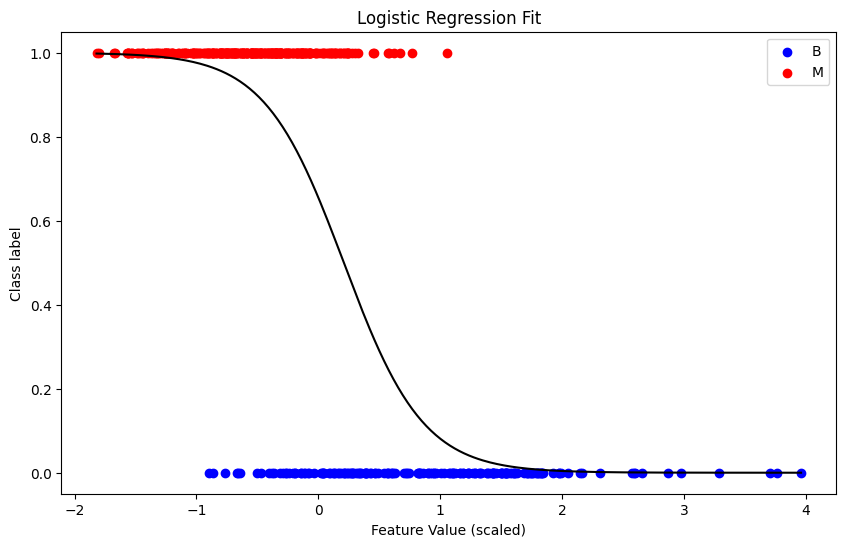

In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# March 2024

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data[:, 0].reshape(-1, 1)  # using only the first feature for visualization
y = data.target

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

# Predict probabilities
x_vals = np.linspace(X_train_scaled.min(), X_train_scaled.max(), 300)
y_probs = clf.predict_proba(x_vals.reshape(-1, 1))[:, 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled[y_train == 0], y_train[y_train == 0], color='blue', label='B')
plt.scatter(X_train_scaled[y_train == 1], y_train[y_train == 1], color='red', label='M')
plt.plot(x_vals, y_probs, color='black')
plt.xlabel('Feature Value (scaled)')
plt.ylabel('Class label')
plt.title('Logistic Regression Fit')
plt.legend()
plt.show()


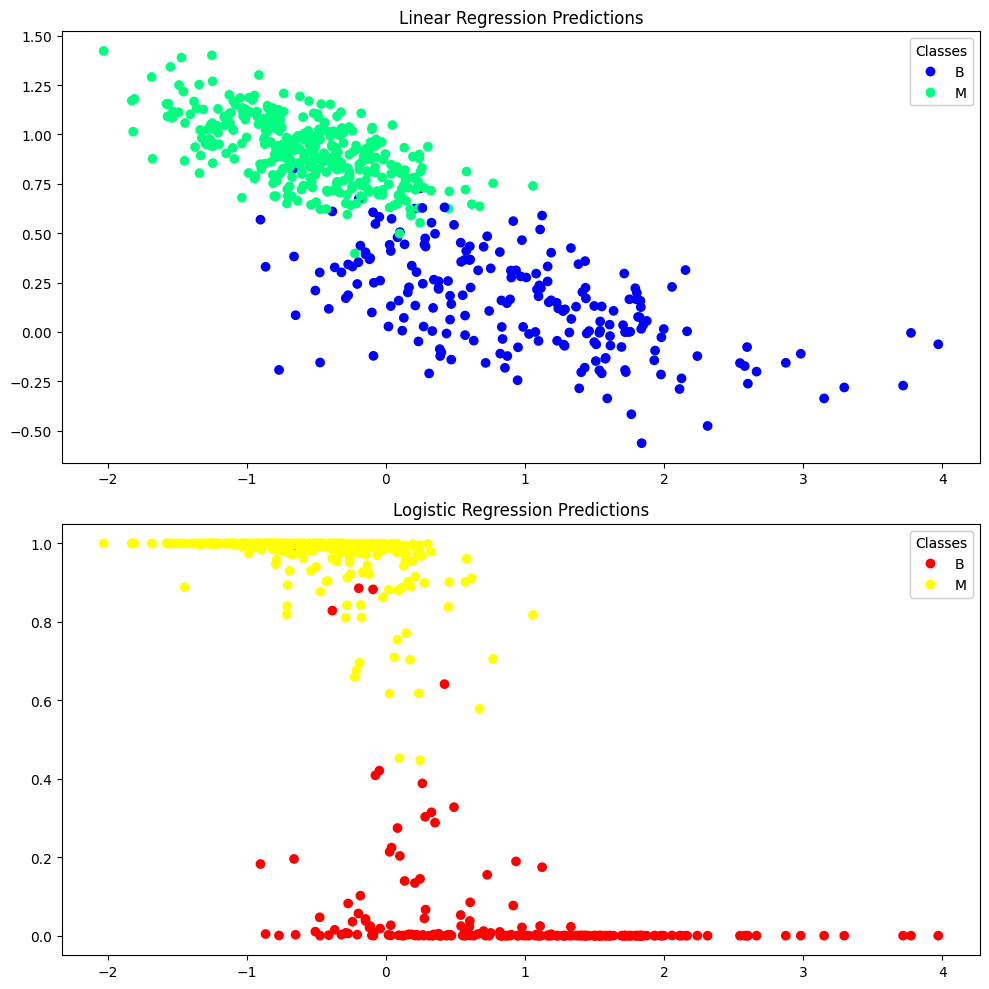

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Load the breast cancer dataset from sklearn
data = load_breast_cancer()
X = data.data
y = data.target

# Preprocess the data
X = StandardScaler().fit_transform(X)

# Linear Regression
linear_regressor = LinearRegression().fit(X, y)
y_pred_linear = linear_regressor.predict(X)

# Logistic Regression
log_regressor = LogisticRegression().fit(X, y)
y_pred_log = log_regressor.predict_proba(X)[:, 1]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Replace numeric target values with 'M' and 'B' for the legend
label_map = {0: 'B', 1: 'M'}
labels = np.vectorize(label_map.get)(y)

# Linear Regression Plot
scatter = ax1.scatter(X[:, 0], y_pred_linear, c=y, cmap='winter')
legend1 = ax1.legend(handles=scatter.legend_elements()[0], labels=['B', 'M'], title="Classes")
ax1.add_artist(legend1)
ax1.set_title("Linear Regression Predictions")

# Logistic Regression Plot
scatter = ax2.scatter(X[:, 0], y_pred_log, c=y, cmap='autumn')
legend2 = ax2.legend(handles=scatter.legend_elements()[0], labels=['B', 'M'], title="Classes")
ax2.add_artist(legend2)
ax2.set_title("Logistic Regression Predictions")

plt.tight_layout()
plt.show()
